In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

In [117]:
data = pd.read_csv('player_data_1_year_back.csv')

In [118]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [119]:
data.columns

Index(['Player', 'Age', 'Player_Season_Num', 'PTS', 'GP', 'prev_GP', 'prev_G',
       'prev_A', 'prev_PTS', 'prev_S', 'prev_TOI', 'career_GP', 'career_G',
       'career_A', 'career_PTS', 'career_S', 'games', 'total_goals_per_game',
       'goals_pp', 'chances_pp', 'shots', 'shot_pct'],
      dtype='object')

In [120]:
X = data[['Age', 'Player_Season_Num', 'prev_GP', 'prev_G',
       'prev_A', 'prev_PTS', 'prev_S', 'career_GP', 'career_G',
       'career_A', 'career_PTS', 'career_S', 'games', 'total_goals_per_game',
       'goals_pp', 'chances_pp', 'shots', 'shot_pct']]
y_init = data[['PTS','GP',]]

In [121]:
def per_game(row):
    return row[0]/row[1]
y_init['PTS/GP'] = y_init.apply(per_game,axis=1)

C:\Users\aronf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
y = y_init.drop(columns=['PTS'])

In [123]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler().fit(X)
scaler_y = StandardScaler().fit(y)
X = scaler.transform(X)
y = scaler_y.transform(y)
#X_test = scaler.transform(X_test)

In [124]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(18, input_dim=18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer='normal', activation='relu'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [125]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=50, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [126]:
estimator.fit(X,y)
y_pred = estimator.predict(X)

In [127]:
y_out = scaler_y.inverse_transform(y_pred)

results_dict = {
    'player': data.Player,
    'PTS': y_init.PTS.values,
    'PTS_predict': np.round(y_out[:,0]*y_out[:,1]),
    'PTS_per_Game': y_init['PTS/GP'].values,
    'PTS_per_Game_predict': y_out[:,1],
    'GP' : y_init.GP.values,
    'GP_predict' : y_out[:,0]
}

In [88]:
results_dict

{'player': 0          A.J. Greer
 1          A.J. Greer
 2        Aaron Broten
 3        Aaron Broten
 4        Aaron Broten
              ...     
 29845    Ziggy Palffy
 29846    Ziggy Palffy
 29847    Ziggy Palffy
 29848    Ziggy Palffy
 29849    Ziggy Palffy
 Name: Player, Length: 29850, dtype: object,
 'PTS': array([ 3,  2, 39, ..., 85, 41, 42], dtype=int64),
 'PTS_predict': array([ 7.,  7.,  8., ..., 38., 70., 24.], dtype=float32),
 'PTS_per_Game': array([0.17647059, 0.13333333, 0.67241379, ..., 1.11842105, 1.17142857,
        1.        ]),
 'PTS_per_Game_predict': array([0.20557465, 0.2156806 , 0.26082066, ..., 0.66330487, 0.94427025,
        0.5060924 ], dtype=float32),
 'GP': array([17, 15, 58, ..., 76, 35, 42], dtype=int64),
 'GP_predict': array([0.20557465, 0.2156806 , 0.26082066, ..., 0.66330487, 0.94427025,
        0.5060924 ], dtype=float32)}

In [128]:
results_df = pd.DataFrame(results_dict)

In [140]:
results_df[results_df.player=='Erik Karlsson']

,player,PTS,PTS_predict,PTS_per_Game,PTS_per_Game_predict,GP,GP_predict
7741,Erik Karlsson,45,30.0,0.600000,0.435658,75,68.712433
7742,Erik Karlsson,78,38.0,0.962963,0.565593,81,66.917267
7743,Erik Karlsson,14,45.0,0.823529,0.837239,17,53.921688
7744,Erik Karlsson,74,51.0,0.902439,0.761763,82,67.535690
7745,Erik Karlsson,66,58.0,0.804878,0.915871,82,63.091129
7746,Erik Karlsson,82,67.0,1.000000,0.920959,82,72.685287
7747,Erik Karlsson,71,70.0,0.922078,1.003360,77,69.985924
7748,Erik Karlsson,62,67.0,0.873239,0.927831,71,72.633865
7749,Erik Karlsson,45,64.0,0.849057,0.884960,53,71.876068
7750,Erik Karlsson,40,47.0,0.714286,0.806733,56,57.767754


In [86]:
y_init.columns

Index(['PTS', 'GP', 'PTS/GP'], dtype='object')

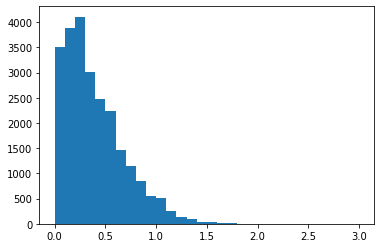

In [130]:
plt.hist(y_init['PTS/GP'], bins=30)
plt.show()

In [141]:
import shap

ImportError: cannot import name 'pinvh' from 'sklearn.utils.fixes' (C:\Users\aronf\Anaconda3\lib\site-packages\sklearn\utils\fixes.py)

In [142]:
from sklearn.cluster import KMeans

ImportError: cannot import name 'pinvh' from 'sklearn.utils.fixes' (C:\Users\aronf\Anaconda3\lib\site-packages\sklearn\utils\fixes.py)